## Google Play Store Data Analysis: Problem Statement 

### Context 
Advertising is a type of marketing communication used to promote or sell products or services. Advertising is usually paid by sponsors and viewed through various media such as websites, apps, emails, and other offline communications. Android is the mobile operating system running on Google OS with about 69% of the market share worldwide. The Google Play Store is the Android app store used to install Android Apps. 

### Objective 
Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store. They need to understand the trend of applications available on the google play store so that they can decide to focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit. As a Data Scientist, you are required to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market. 

### Guidelines 
1. Perform univariate analysis on the data to better understand the variables at your disposal. 
2. Perform bivariate analysis to better understand the correlation between different variables. 
3. Create visualizations to explore data and extract the insights.

### Data: 
https://docs.google.com/spreadsheets/d/1j95cD_WyY9EuA9ZdM8d7MWKu1hrdUAUj4LMQ6bscbrQ/edit?usp=sharing 

- App: Application Name 
- Category: Category the app belongs to 
- Rating: Overall user rating of the app 
- Reviews: Number of user reviews for the app 
- Size: Size of the app in kilobytes 
- Installs: Number of user downloads/installs for the app 
- Price: price of an app in dollars 
- Paid/Free: Whether an app is paid or free (Yes/No) 
- Content Rating: Age group the app is targeted at 
- Ad Supported: whether an app supports an Ad or not (Yes/No) 
- In App Purchases: App containing in app purchase feature or not (Yes/No) 
- Editors Choice: Whether rated as Editor Choice (Yes/No)

In [1]:
# Link to the data: https://docs.google.com/spreadsheets/d/1j95cD_WyY9EuA9ZdM8d7MWKu1hrdUAUj4LMQ6bscbrQ/edit?usp=sharing

# Importing the library to load the data
import pandas as pd
import numpy as np

# importing the package to use for the visualization
import matplotlib.pyplot as mpl
import seaborn as sb
from utils import histogram_boxplot, labeled_barplot


# loading the data
GoogleSheet_ID = "1j95cD_WyY9EuA9ZdM8d7MWKu1hrdUAUj4LMQ6bscbrQ"

url = f'https://docs.google.com/spreadsheets/d/{GoogleSheet_ID}/gviz/tq?tqx=out:csv'

df = pd.read_csv(url)

- The necessary libraries were imported.
- Then the data was loaded.

In [2]:
# Duplicating the data

data = df.copy()

- Making a duplicate of the data, so that the original data will be intact for subsequent use. 

### Exploring The Data (Exploratory Data Analysis, EDA)

In [13]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,NaN,11.0,36.0,5000,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,2.5,12.0,12.0,1000,Free,0.0,Everyone,No,No,No


- Getting an overview of the first five rows of the data.

In [16]:
data.shape

(4153, 12)

- The data has 4153 rows and 12 columns.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   int64  
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 389.5+ KB


- The columns in the data consist of different datatype such as floats (four in total), strings or objects (seven in total) and integers (just one).

- The "Review" and "Rating" columns have missing values.


In [18]:
data.duplicated().sum()

0

- The data do not have duplicates

In [20]:
data.isna().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

- The "Rating" column has 177 missing values.

- The "Review" column has 124 missing values.

In [21]:
data.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

- Just checking if the data has empty string (null values) aside from the missisg values (non-available,NA or not-a-number, NAN).
- There are no empty strings because the output of "isnull" is the same as that for "isna".

In [3]:
"""Getting the statistical summary or overview of the data, and then transpose it. By default, dot describe only show the 
numerical variables, so include was set to be all, so that both the categorical and the numeric variables or columns can be 
displayed"""

data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,4153,4153,War Dragons,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4153,15,Others,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3976.0,NaN,NaN,NaN,4.189487,0.519792,1.0,4.0,4.3,4.5,5.0
Reviews,4029.0,NaN,NaN,NaN,66964.206751,107418.85154,1.0,224.0,7461.0,78219.0,312204.0
Size,4153.0,NaN,NaN,NaN,82.254408,92.256334,0.011,22.0,42.0,84.0,270.0
Installs,4153.0,NaN,NaN,NaN,3232705.641946,5421343.284861,1.0,10000.0,500000.0,5000000.0,19970000.0
Paid/Free,4153,2,Free,3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4153.0,NaN,NaN,NaN,0.565341,8.926313,0.0,0.0,0.0,0.0,399.99
Content Rating,4153,4,Everyone,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,4153,2,Yes,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The maximum (max) and minimum (min) ratings are 5.0 and 1.0 respectively.
- Majority of the Apps are free (not paid for).
- Lowest number of user download is one.
- Highest content rating is for "Everyone".
- The category with the highest number of Apps is "Others".
- "War Dragon" is the highest used or highest occuring App name.

### Data Cleaning and Preprocessing

In [33]:
data.Rating.unique()

array([3.9, 4.4, nan, 2.5, 2.8, 4.5, 4.2, 4.8, 3.8, 1. , 4.6, 4.1, 3.5,
       4.9, 2.3, 4. , 4.3, 4.7, 3.6, 3.2, 5. , 3.3, 3.7, 2.2, 3.4, 2.7,
       2.9, 1.8, 3.1, 3. , 2.6, 2.4, 2. , 1.6, 2.1, 1.9, 1.7, 1.2, 1.4])

In [34]:
data.Rating.nunique()

38

- There are 38 different or unique rating scale, of which only 37 is valid because one category is nan (missing or no input).

In [31]:
data["Rating"].value_counts()

4.4    453
4.3    453
4.5    441
4.2    410
4.6    353
4.1    310
4.0    244
4.7    225
3.9    164
3.8    120
4.8    115
5.0     88
3.7     87
3.6     74
3.5     72
4.9     49
3.4     49
3.1     36
3.3     35
3.0     34
3.2     30
2.9     25
2.8     20
2.6     11
2.5     10
2.3     10
2.7      8
2.4      8
2.2      7
2.0      7
1.9      6
1.8      5
1.0      5
2.1      5
1.6      2
1.7      2
1.4      2
1.2      1
Name: Rating, dtype: int64

- Count of each of the unique rating scale.
- Rating values of 4.4 and 4.3 have the highest count of 453.

In [35]:
data.Reviews.nunique()

2602

- There are 2,602 reviews 

In [5]:
# The subset arguement will be used to drop the missiong values in the respective columns.

data.dropna(subset= ["Rating", "Reviews"], inplace= True)

# Resetting the index

data.reset_index(drop= True, inplace= True)

- The missing values in both reviews and rating would be dropped because they are not error or mistake or carelessness. It was a deliberate act by these set of users. Additionally, in reality it is not obligatory for users to rate or give review.

In [6]:
# Rechecking for missing values.

data.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

- The data do not have missing values anymore

# Data Visualization

## Univariate Analysis

#### Numerical Varibles

Histoplot is used for numerical (discret and continuous) variables but more suitable for continuous numerical variable.

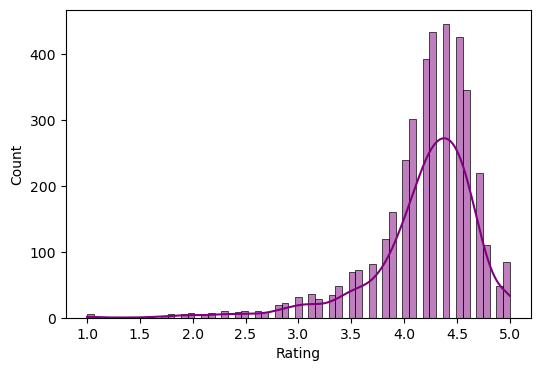

In [85]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Rating", kde= True, color="purple");

- Majority of the App ratings in google play store.
- The highest ratings are between ~ 4.1 to ~ 4.6.
- The distribution is left-skewed due to outliers, meaning the mean is far lesser than the median.

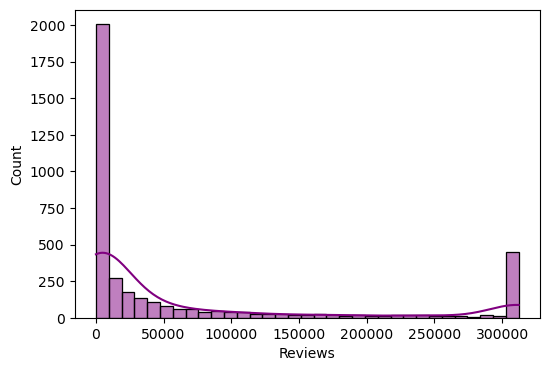

In [84]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Reviews", kde= True, color= "purple");

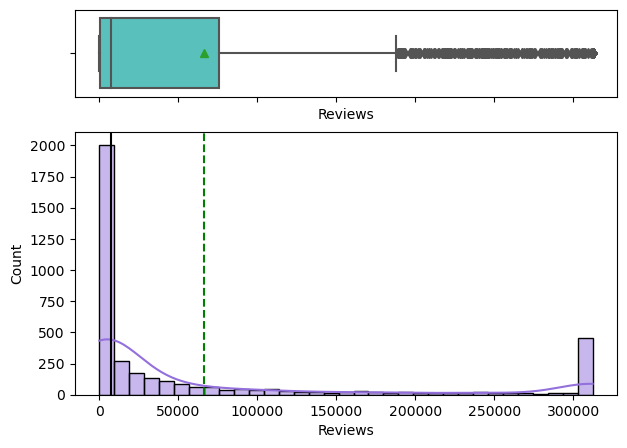

In [121]:
histogram_boxplot(data= data, feature= "Reviews",figsize= (7,5), kde= True)

- Majority of the Apps (precisely 2000) in google store App do not have any review. Maybe the App is new, or the review section was disactivated by the App owners.
- The distribution in the "Review" variable is irregular because the two highest counts are on both extreme (lowest and highest reviews).
- This joint-plot (boxplot and histplot) is just to display the presence of outliers using the box-plot (the plot above).

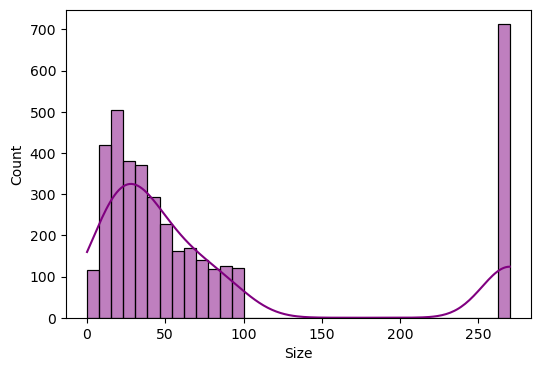

In [83]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Size", kde= True, color= "purple");

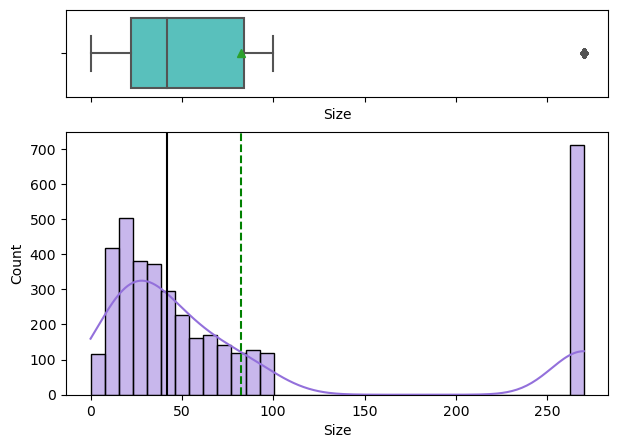

In [122]:
histogram_boxplot(data= data, feature= "Size",figsize= (7,5), kde= True)

- From the distribution, it can be deduced that most of the Apps are low sized (less than 100 kilobytes).
- There is presence of an outlier, making the distribution to be right-skewed.

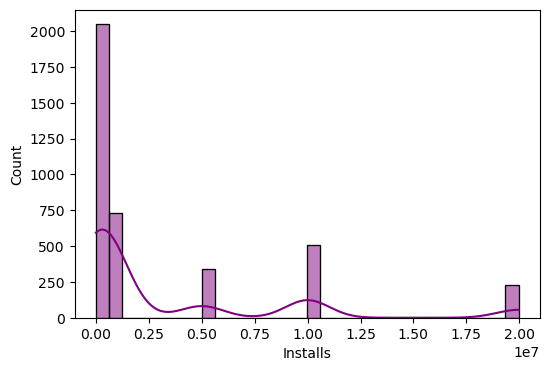

In [86]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Installs", kde= True, color= "purple");

- The greater number of Apps (from ~ 750 to ~ 2000) in the google play store have low number (a million and even less) of user downloads and installations.
- Apps with high number of user downloads (five millions and even up to twenty millions) are not many (around 200 to 500).

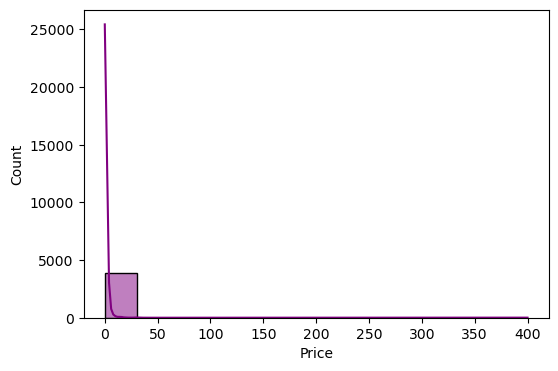

In [87]:
mpl.figure(figsize= (6,4))
sb.histplot(data= data, x = "Price", kde= True, color= "purple");

- Majority of the Apps are free, while others are fairly cheap.

#### Categorical Variables

Bar chart is used for a single categorical variable. Example of this is a count plot.

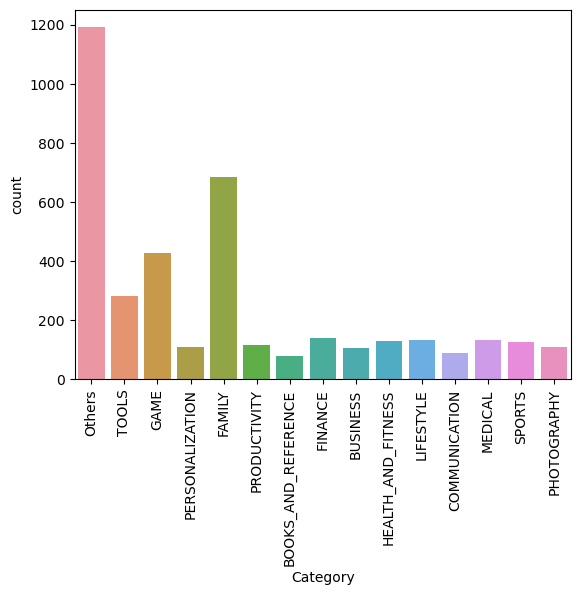

In [98]:
sb.countplot(data= data, x= "Category")

plt.xticks(rotation = 90)

plt.show()

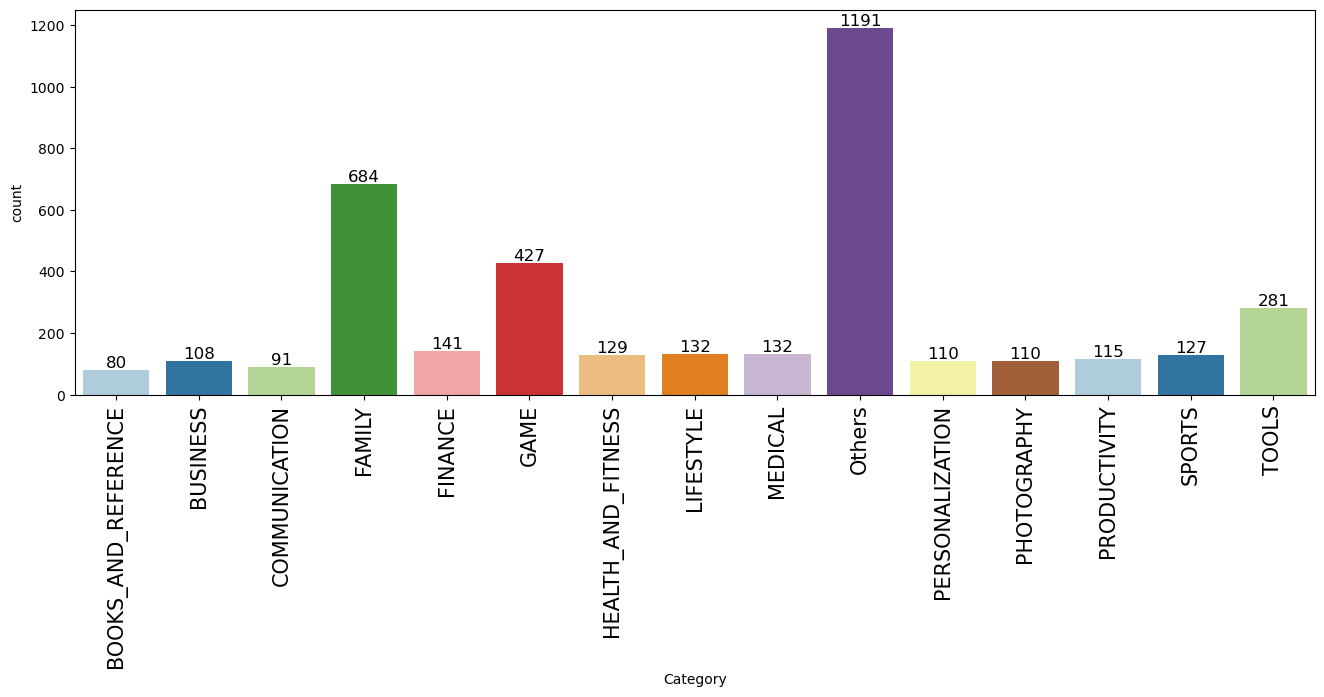

In [131]:
# Getting the actual count

labeled_barplot(data= data, feature= "Category")

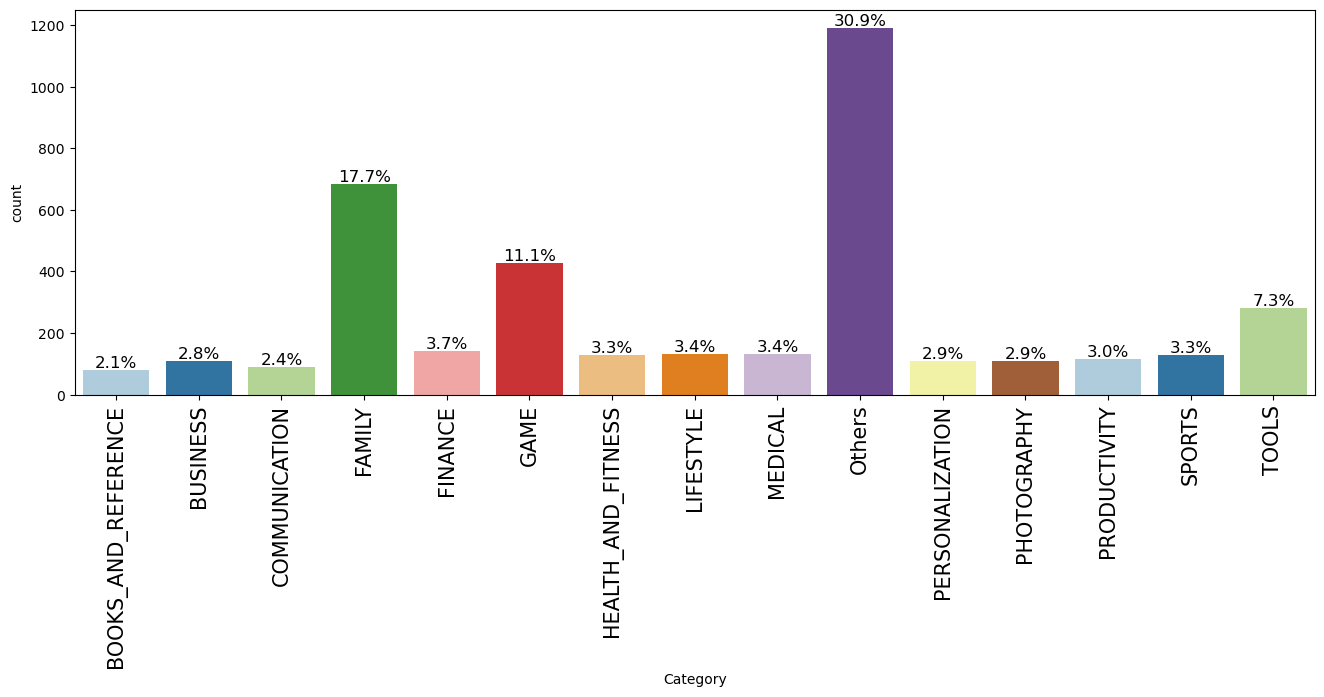

In [112]:
# Getting the percentage count

labeled_barplot(data= data, feature= "Category", perc= True)

- Most of the Apps belong to the "Others" category with a value of 1191 or 30.9%, while the least number of Apps belong to the "Books_And_Reference" category having a count of 80 (2.1%).

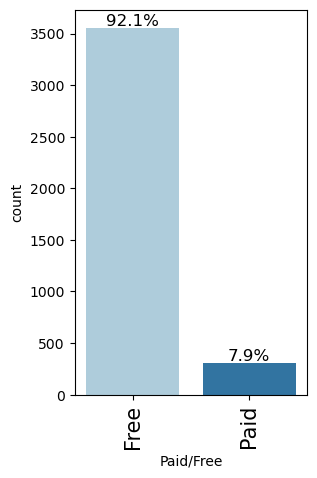

In [113]:

labeled_barplot(data= data, feature= "Paid/Free", perc= True)

- More than 90% (precisely 92.1%) of the Apps on google play store are free, while only 7.9% are paid for.

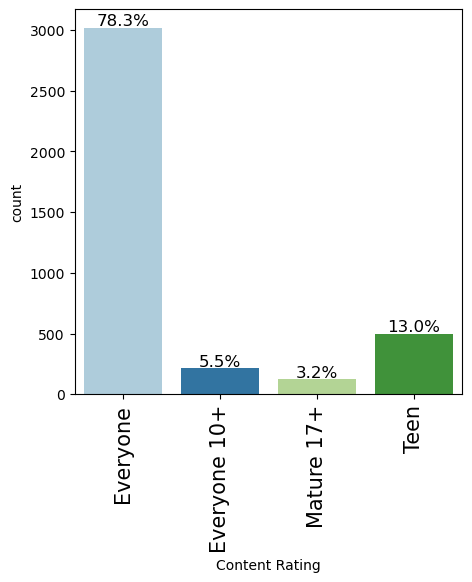

In [114]:
labeled_barplot(data= data, feature= "Content Rating", perc= True)

- Majority of the Apps (78.3%) have their content rating to be for everyone (without restrictions). 

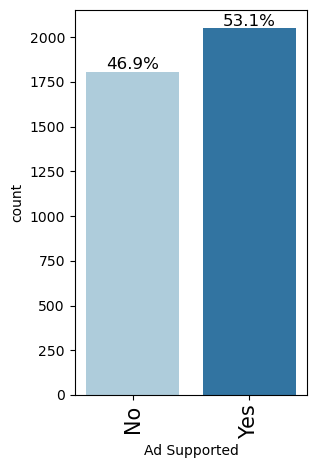

In [135]:
labeled_barplot(data= data, feature= "Ad Supported", perc= True)

- Although, not all the Apps in google play stop support advertisement, nonetheless, 53.1% of the Apps support advertisement.

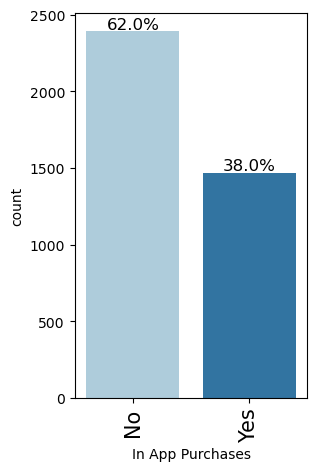

In [136]:
labeled_barplot(data= data, feature= "In App Purchases", perc= True)

- Only 38% of the Apps in google play store has "In App Purchase", which means the others (62%) are generally free without any hidden fees like subcriptions, premium features, game add-on, etc.

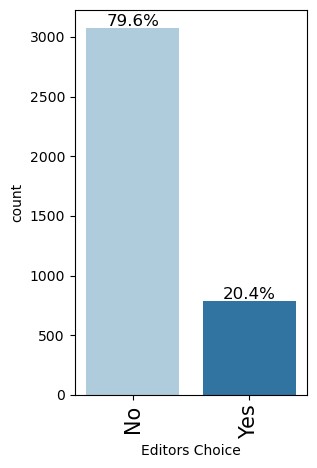

In [137]:
labeled_barplot(data= data, feature= "Editors Choice", perc= True)

- Google play store has the "Editors Choice" section of  79.6% of its Apps turned off or deactivated. Only 20.4% of the Apps have this section activated.

## Bivariate Analysis

- This is used to explore the relationship (positive, negative or none) between two variables, most especially between the targets and other variables.
- For the sake of this project, the "Rating" will be the target.

In [44]:
data_corr = data.corr()

data_corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.192627,0.136766,0.132992,-0.004418
Reviews,0.192627,1.000000,0.395549,0.864082,-0.034280
Size,0.136766,0.395549,1.000000,0.329159,-0.020438
Installs,0.132992,0.864082,0.329159,1.000000,-0.035374
Price,-0.004418,-0.034280,-0.020438,-0.035374,1.000000


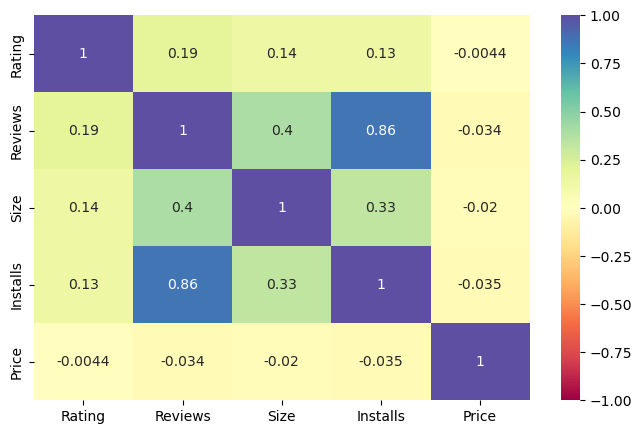

In [145]:
mpl.figure(figsize= (8,5))
sb.heatmap(data_corr, vmax= 1, vmin= -1, annot= True, cmap= "Spectral");


- The variables general have low correlation (both positve and negative) with one another, unless for "review" and "installs" that have a high positive correllation, which means that as the number of installation increases, the review increace and vice versa.
- Price has a negative and low correllation to all variables. Meaning, the users prefer free Apps than paid Apps.
- The number of installs (number of user downloads/installs) has a average but positive correlation with the size of the App, meaning the number of downloads increase fairly with the size of the App.
- There is a positive correlation (although not so high) between "Rating" and "Review". This means that the more the rating, the but not exclusively (that is, not every rating has an accompanying review and vice versa). 

## Scattered Plot

- This is used for two numerical variables.

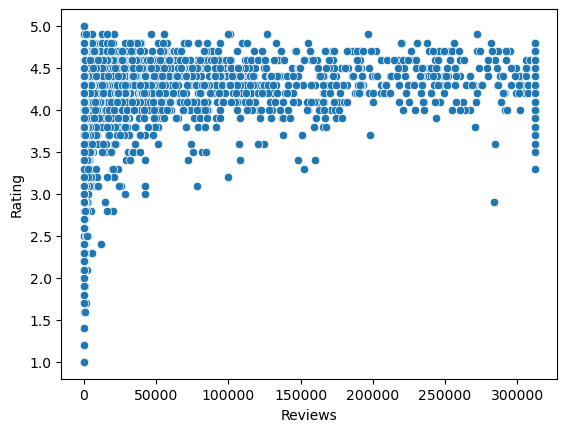

In [146]:
sb.scatterplot(data= data, y = "Rating", x="Reviews");

- Change (increase) in the number of reviews does not have much influence in the rating of an App.
- Nonetheless, Apps with low or no reviews got the lowest ratings, but still got the highest rating of 5.0.

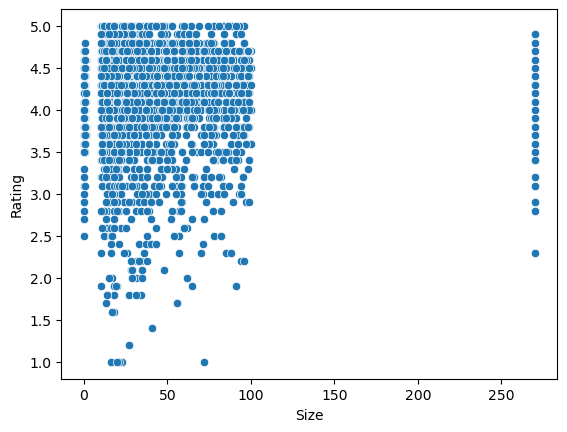

In [148]:
sb.scatterplot(data= data, y = "Rating", x="Size");

- The size of an App has no corresponding influence on the rating of an App. What this means is that, increasing the size of an App does not lead to an increase in the rating. Infact, most of the ratings were from low-sized Apps.

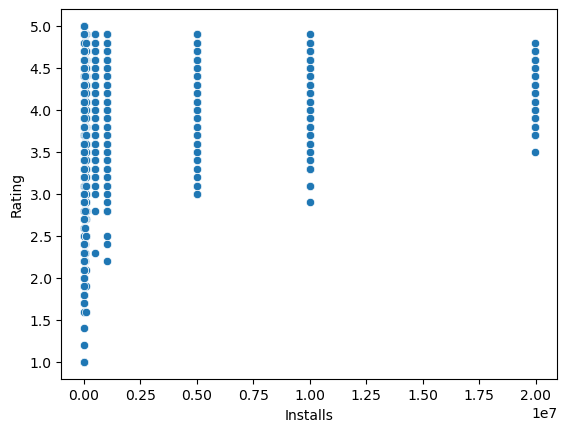

In [149]:
sb.scatterplot(data= data, y = "Rating", x="Installs");

- There is no linear relationship between "Rating" and "Installs(number of downloads)". 
- However, the higher the number of doenloads, the higher the rating on average. This means that the more people are satisfied with an App, the more they would want to download it into other of their devices and the more they would refer such an App to others (family members, friends, colleaques or acquaintances).

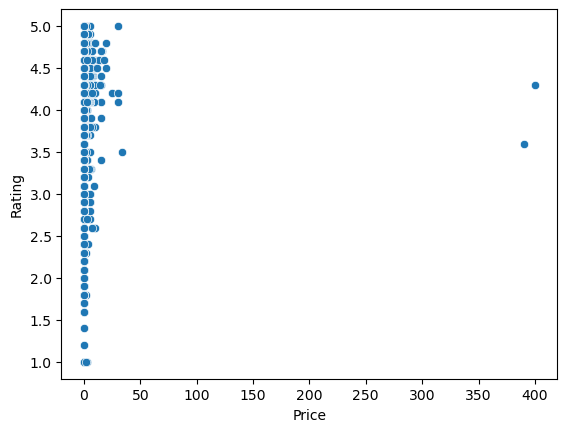

In [150]:
sb.scatterplot(data= data, y = "Rating", x="Price");

- There is no positive correlation between "Price" and "Rating" of an App, but rather there is a slight negative correlation.
- This means that an increase in the price of an App does not lead to a corresponding increase in the rating of such App, but instead, the higher the price of an App, the scantier or absence of the rating of such App. This can also be interpreted as, the higher the price of an App the lesser the number of downloads of such App.

## Categorical Plots

- Used for bivariate plots in which one of the variable is numerical (preferably the target) and the other is categorical (object type).

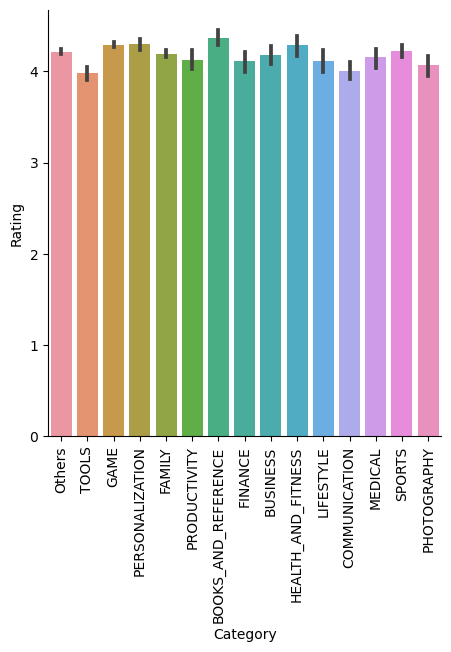

In [166]:
sb.catplot(data= data, y = "Rating", x = "Category", kind= "bar")

mpl.xticks(rotation = 90);

- All categories have very high rating, although "Books_And_Reference" has the highest rating among all other categories.

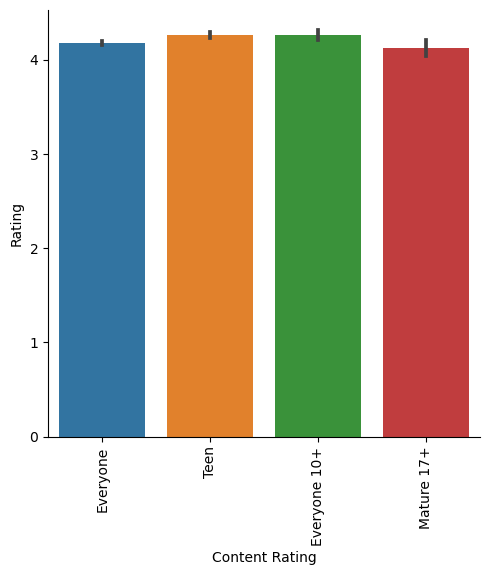

In [170]:
sb.catplot(data= data, y = "Rating", x = "Content Rating", kind= "bar")

mpl.xticks(rotation = 90);

- All sections in "Content Rating" have nearly equal rating values, although "Teen" and "Everyone 10+" have the highest ratings.

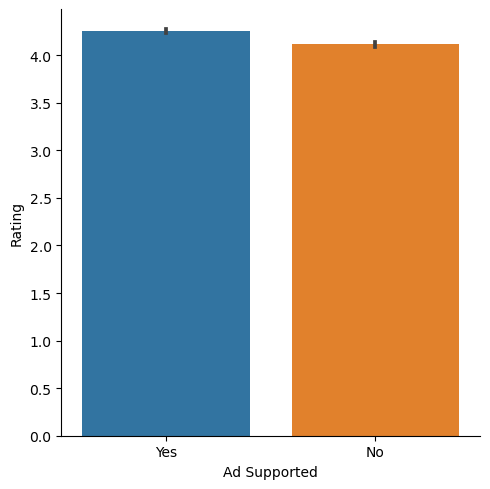

In [199]:
sb.catplot(data= data, y = "Rating", x = "Ad Supported", kind= "bar");

- Apps with "Ad Supported" features had higher ratings to Apps that do not have.

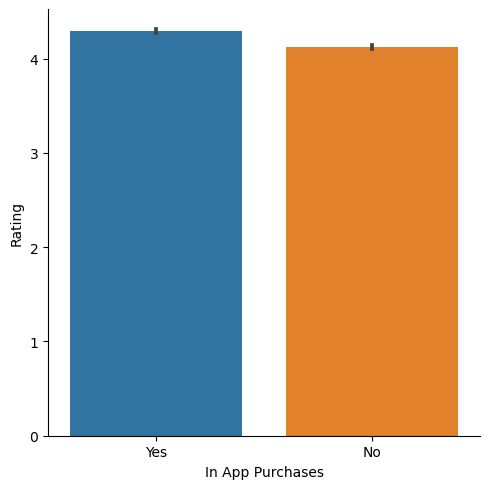

In [200]:
sb.catplot(data= data, y = "Rating", x = "In App Purchases", kind= "bar");

- Apps with "in App Purchases" had higher ratings to Apps that do not have.

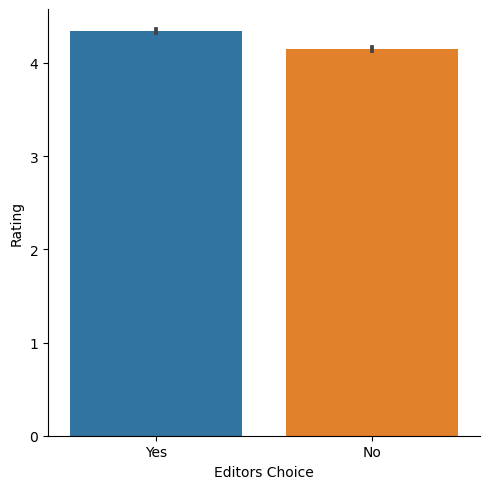

In [201]:
sb.catplot(data= data, y = "Rating", x = "Editors Choice", kind= "bar");

- Apps with the "Editors Choice" activated had higher ratings to Apps without an active editors choice.

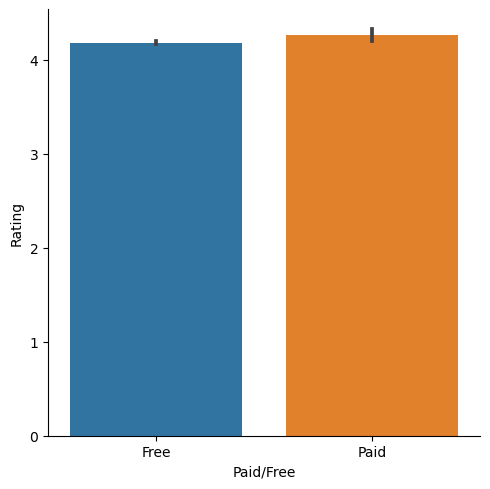

In [202]:
sb.catplot(data= data, y = "Rating", x = "Paid/Free", kind= "bar");

- Paid Apps received higher ratings than unpaid Apps.

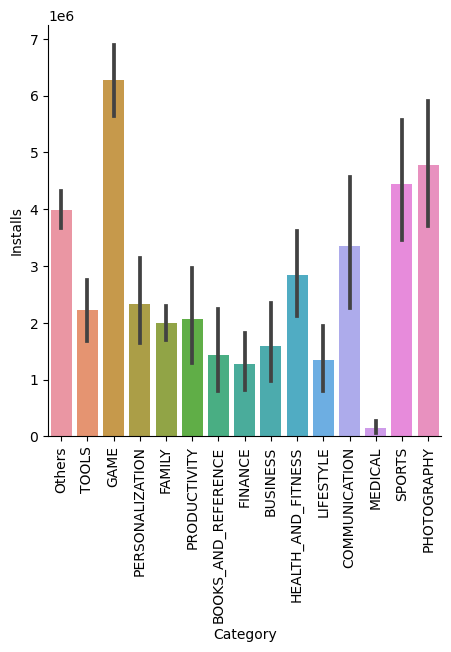

In [176]:
sb.catplot(data= data, y = "Installs", x = "Category", kind= "bar")

mpl.xticks(rotation = 90);

- The category "Game" has the highest number of downloads/installs, with a value of over 6,000,000.

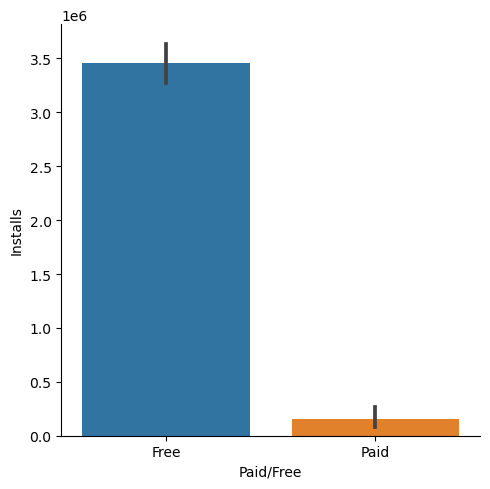

In [203]:
sb.catplot(data= data, y = "Installs", x = "Paid/Free", kind= "bar");

- The "Free" Apps had the highest value of over 3,000,000 downloads/installs, than "Paid" Apps which had far below 500,000 downloads.

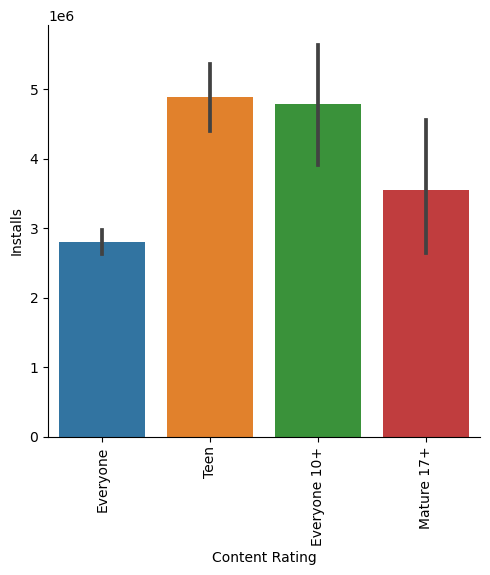

In [180]:
sb.catplot(data= data, y = "Installs", x = "Content Rating", kind= "bar")

mpl.xticks(rotation = 90);

- The content ratings "Teen" and "Everyone 10+" have the highest number of downloads/installs, with average values of about 5,000,000.

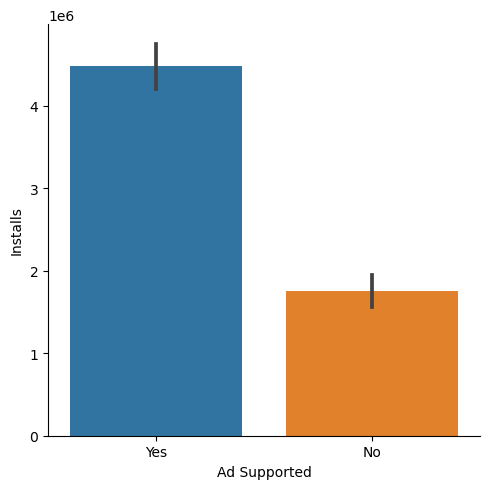

In [204]:
sb.catplot(data= data, y = "Installs", x = "Ad Supported", kind= "bar");

- The Apps which are "Ad Supported" have more number of downloads/installs (above 4,000,000), than Apps which are not Ad supported (number of downloads below 2,000,000).

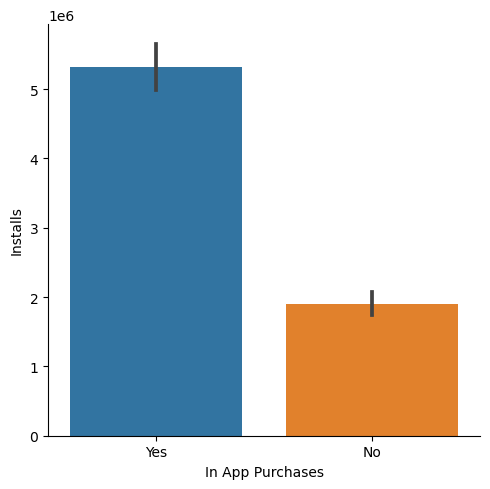

In [205]:
sb.catplot(data= data, y = "Installs", x = "In App Purchases", kind= "bar");

- Apps with "In App Purchases"  have higher number of downloads/installs (above 5,000,000), than Apps which do not.

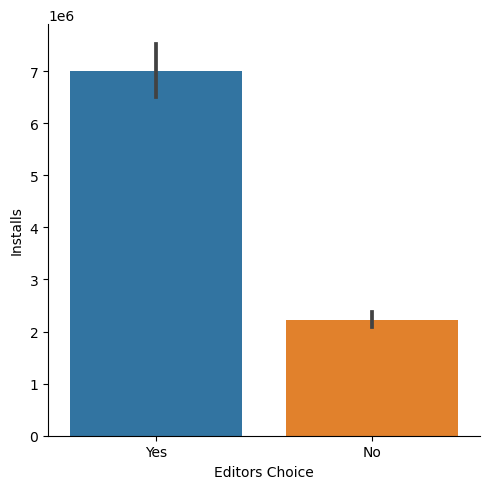

In [206]:
sb.catplot(data= data, y = "Installs", x = "Editors Choice", kind= "bar");

- The Apps with the "Editors Choice" have an average of 7,000,000 downloads/installs, compared to Apps which do not have this feature, with a value around 2,000,000 downloads.
- Summary of the installs: Game Apps, Everyone 10+, Ad Supported Apps, In App Purchases, Editors Choice Apps and free Apps have the highest number of downloads in their respective categories.

# Suggestions And/Or Recommendations.

- The company (zoom Ad advertising agency) should focus more on Apps that have high ratings, since more users are in this category.

- The company should focus on promoting their advertisement on the free and very cheap Apps, because users prefer Apps with little or no price, than paid Apps. Although paid Apps had higher rating than free App, however, such paid Apps seem to be relatively cheap.

- The company should focus on Apps which high number of downloads in millions, in order to reach out to millions of users at a go.

- Although, only 20.4% of the Apps in google play store have the "Editors Choice" activated. Notwithstanding, the company should focus on this category since they have the highest ratings. Additionally, Apps with "Editors Choice" showcase reviews of the best andriod Apps, because this will save time and aim only at the best of Apps.

- The company should focus on low-sized Apps rather than large-sized Apps.

- The company should explore and concentrate in all categories of Apps, although “Book_And_Reference” could be given more focus. In a similar manner, all aspects of “Content Rating” should be adequately considered.

- The company should also concentrate more on Apps that have higher number of downloads (for example, Game Apps).

- Apps with "Ad Supported" features had higher ratings, higher user downloads and even more number of Apps available on google play store than Apps that do not have these feature. So the company should put more emphasis on "Ad Supported" Apps.

- The company should focus more on Apps that have "In App Purchases" since they have the highest ratings as well as the highest number of downloads. Although, the company should also pay attention on Apps that do not have "In App Purchases" since they are generally free without any hidden fees like subcriptions, premium features, game add-on, etc, and they have higher number of Apps (not higher number of user downloads) on google play store.

- For the sake of statistics and overall rating, the company should focus more on Apps that have more reviews (for example, 50,000 and above), than those with little or no reviews. However, the company should not inplicitly base her strength on the number of review an App has, because the distribution was not regular and majority of the users did not drop any review. This does not mean that the Apps are bad, maybe the users were too lazy or busy to comments, rather they might prefer to air their level of satisfaction and dissatisfaction using the rating options.